## 9장. 케라스2 응용
실제 문제에 인공지능을 활용할 때 생기는 문제들을 효율적으로 처리하는 케라스의 응용 기능을 알아봅시다.

### 9.2 미리 학습한 모델 사용하기
학습 데이터가 많지 않을 때 성능을 높이는 또 다른 방법은 기존에 미리 학습한 모델을 활용하는 겁니다.

In [1]:
# set to use CPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

### 9.1.1 응용 코드 구현
#### 9.1.1.1 응용 코드를 위한 패키지 임포트

In [2]:
#from keras import datasets
#import keras
#from keraspp import aigen
from sklearn import model_selection
from tensorflow.keras import datasets
from tensorflow import keras
assert keras.backend.image_data_format() == 'channels_last'
from keraspp import aigen

#### 9.1.1.2 머쉰 클래스 상속하여 데이터 지정

In [3]:
class Machine(aigen.Machine_Generator):
    def __init__(self):
        (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
        _, X, _, y = model_selection.train_test_split(x_train, y_train, test_size=0.02)
        X = X.astype(float)

        gen_param_dict = {'rotation_range': 10}

        super().__init__(X, y, nb_classes=10, gen_param_dict=gen_param_dict)

(800, 32, 32, 3) (800, 1)
X_train shape: (800, 32, 32, 3)
800 train samples
200 test samples
data.input_shape (32, 32, 3)
(800, 32, 32, 3)
Instructions for updating:
Please use Model.fit, which supports generators.


2021-11-05 16:47:01.446258: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-11-05 16:47:01.480860: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-05 16:47:01.480912: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (SJKIM-Home): /proc/driver/nvidia/version does not exist
2021-11-05 16:47:01.481894: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-11-05 16:47:01.491333: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 3599995000 Hz
2021-11-05 16:47:01.492397: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56217e882470 initialized for platform Host (this does not guarantee that XLA will be used). Devi

Epoch 1/100
10/10 [==============================] - 3s 258ms/step - loss: 2.3285 - accuracy: 0.0988 - val_loss: 2.2998 - val_accuracy: 0.1100
Epoch 2/100
10/10 [==============================] - 2s 210ms/step - loss: 2.3329 - accuracy: 0.0904 - val_loss: 2.2992 - val_accuracy: 0.1050
Epoch 3/100
10/10 [==============================] - 2s 224ms/step - loss: 2.3271 - accuracy: 0.1020 - val_loss: 2.2988 - val_accuracy: 0.1150
Epoch 4/100
10/10 [==============================] - 2s 216ms/step - loss: 2.3237 - accuracy: 0.0988 - val_loss: 2.2983 - val_accuracy: 0.1050
Epoch 5/100
10/10 [==============================] - 2s 231ms/step - loss: 2.3246 - accuracy: 0.1002 - val_loss: 2.2981 - val_accuracy: 0.1050
Epoch 6/100
10/10 [==============================] - 2s 214ms/step - loss: 2.3185 - accuracy: 0.1014 - val_loss: 2.2974 - val_accuracy: 0.1000
Epoch 7/100
10/10 [==============================] - 2s 192ms/step - loss: 2.3189 - accuracy: 0.1085 - val_loss: 2.2970 - val_accuracy: 0.1050

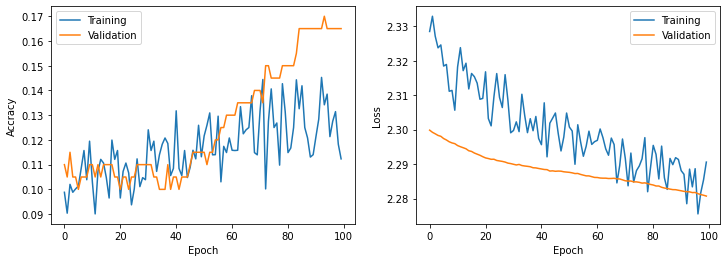

In [4]:
def main():
    m = Machine()
    m.run()

main()

---
### 9.2.3 전체 코드

In [ ]:
"""
CH 9.2 Pretrained Method
"""
from sklearn import model_selection
from keras import datasets
import keras
assert keras.backend.image_data_format() == 'channels_last'

from keraspp import aiprt


class Machine(aiprt.Machine_Generator):
    def __init__(self):
        (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
        _, X, _, y = model_selection.train_test_split(x_train, y_train, test_size=0.02)
        X = X.astype(float)

        # gen_param_dict = {'rotation_range': 10}

        super().__init__(X, y, nb_classes=10)


def main():
    m = Machine()
    m.run()

main()

(800, 32, 32, 3) (800, 1)
X_train shape: (800, 32, 32, 3)
800 train samples
200 test samples


2021-11-05 18:24:09.440288: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-11-05 18:24:09.665928: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-11-05 18:24:09.666113: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.455GHz coreCount: 5 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 104.43GiB/s
2021-11-05 18:24:09.666289: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-11-05 18:24:09.667926: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-11-05 18:24:09.669100: I tensorflow/stream_executor

Compile is done!=======================
(800, 32, 32, 3)


2021-11-05 18:24:10.477570: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
